In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
url = "https://raw.githubusercontent.com/digipodium/Datasets/main/regression/50_Startups.csv"
df = pd.read_csv(url)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
state_enc = OneHotEncoder(drop='first')
dummy_state = state_enc.fit_transform(df[['State']]).toarray() # one-hot encoding
df = pd.concat([pd.DataFrame(dummy_state),df], axis=1) # concatenate encoded dummy columns
df.head() 

,0,1,R&D Spend,Administration,Marketing Spend,State,Profit
0,0.0,1.0,165349.20,136897.80,471784.10,New York,192261.83
1,0.0,0.0,162597.70,151377.59,443898.53,California,191792.06
2,1.0,0.0,153441.51,101145.55,407934.54,Florida,191050.39
3,0.0,1.0,144372.41,118671.85,383199.62,New York,182901.99
4,1.0,0.0,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.columns = df.columns.astype(str)
X = df.drop(columns=['State','Profit'])
y = df['Profit']
scaler = StandardScaler()
X = scaler.fit_transform(X) # returns a numpy array

backward elimination

In [7]:
X.shape[0]

50

In [8]:
np.ones((X.shape[0],1)).astype(int)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [9]:
X = np.hstack([np.ones((X.shape[0],1)).astype(int),X])
X

array([[ 1.00000000e+00, -6.85994341e-01,  1.39326109e+00,
         2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.00000000e+00, -6.85994341e-01, -7.17740563e-01,
         1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.00000000e+00,  1.45773797e+00, -7.17740563e-01,
         1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.00000000e+00, -6.85994341e-01,  1.39326109e+00,
         1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.00000000e+00,  1.45773797e+00, -7.17740563e-01,
         1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.00000000e+00, -6.85994341e-01,  1.39326109e+00,
         1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.00000000e+00, -6.85994341e-01, -7.17740563e-01,
         1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.00000000e+00,  1.45773797e+00, -7.17740563e-01,
         1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.00000000e+00, -6.85994341e-01,  1.393

In [10]:
X.shape

(50, 6)

In [11]:
from statsmodels.api import OLS

In [12]:
Xopt = X[:, [0,1,2,3,4,5]]
ols = OLS(endog=y, exog=Xopt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.34e-27
Time:                        16:22:13   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   1334.905     83.911      0.000    1.09e+05    1.15e+05
x1            92.7302   1572.494      0.059      0.953   -3076.424    3261.885
x2           -19.8422   1542.414     -0.013      0.990   -3128.374    3088.690
x3          3.663e+04   2108.775     17.369      0.000    3.24e+04    4.09e+04
x4          -748.9975   1448.705     -0.517      0.608   -3668.671    2170.676
x5          3266.2152   2075.251      1.574      0.123    -916.178    7448.608
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                         2.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [13]:
Xopt = X[:, [0,1,3,4,5]]
ols = OLS(endog=y, exog=Xopt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           8.49e-29
Time:                        16:22:39   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   1319.992     84.859      0.000    1.09e+05    1.15e+05
x1           102.6987   1353.031      0.076      0.940   -2622.445    2827.843
x2          3.662e+04   2080.207     17.606      0.000    3.24e+04    4.08e+04
x3          -748.7499   1432.394     -0.523      0.604   -3633.740    2136.240
x4          3266.2019   2052.066      1.592      0.118    -866.872    7399.276
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                         2.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [14]:
Xopt = X[:, [0,3,4,5]]
ols = OLS(endog=y, exog=Xopt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        16:22:58   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   1305.649     85.791      0.000    1.09e+05    1.15e+05
x1          3.661e+04   2051.533     17.846      0.000    3.25e+04    4.07e+04
x2          -743.7733   1415.345     -0.526      0.602   -3592.715    2105.168
x3          3296.2630   1991.607      1.655      0.105    -712.633    7305.159
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
Xopt = X[:, [0,3,5]]
ols = OLS(endog=y, exog=Xopt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           2.16e-31
Time:                        16:23:58   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.12e+05   1295.556     86.459      0.000    1.09e+05    1.15e+05
x1           3.62e+04   1878.872     19.266      0.000    3.24e+04       4e+04
x2          3620.6842   1878.872      1.927      0.060    -159.118    7400.487
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df['pred_2'] = ols.predict(Xopt)

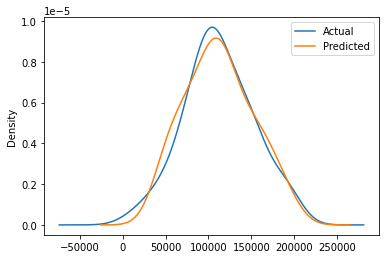

In [18]:
df['Profit'].plot(kind='kde',label='Actual')
df['pred_2'].plot(kind='kde',label='Predicted')
plt.legend()
plt.show()

In [17]:
px.scatter(df, y=['Profit','pred_2'], title='Predicted vs Actual')